In [257]:
import pandas as pd 
import numpy as np
import pickle 

In [258]:
# load pickles 
tweets_pkl = open("tweets.pkl", "rb")
tweets_df = pickle.load(tweets_pkl)

tweets_sent_pkl = open("tweets_sent.pkl", "rb")
tweets_sent = pickle.load(tweets_sent_pkl)

stocks_pkl = open("stocks.pkl", "rb")
stocks = pickle.load(stocks_pkl)

tweet_sent_pkl = open("stock_tweet_sentiment.pkl", "rb")
tweets = pickle.load(tweet_sent_pkl)

reviews_pkl = open("reviews.pkl", "rb")
ratings = pickle.load(reviews_pkl)

news_sent_pkl = open("news_sent.pkl", "rb")
news = pickle.load(news_sent_pkl)

In [259]:
tweets = tweets_sent.copy()

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 6 columns):
Tweet        3218 non-null object
Date         3218 non-null datetime64[ns]
Sentiment    3218 non-null float64
Positive     3218 non-null float64
Neutral      3218 non-null float64
Negative     3218 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 150.9+ KB


In [261]:
# change to datetime 
tweets["Date"] = pd.to_datetime(tweets["Date"])

In [262]:
# find extreme positive and negative tweets 
positive_tweets = tweets[tweets["Sentiment"] > .7]
negative_tweets = tweets[tweets["Sentiment"] < -.7]

## Positive Tweet analysis

In [263]:
positive_tweets.shape

(289, 6)

In [264]:
positive_examples = [60, 122, 191, 469, 884, 938, 952, 953, 980, 1004, 
                     1129, 1158, 1176, 1203, 1234, 1384, 1772, 1901,
                    1924, 2149, 
                     2244, # this one!,
                    2345, # also this one!
                    2375, 2427, 2514, 2577, 2614, 2648, 2667, 2695, 2703,
                    2726, 2786, 2814, 2820, 3000, 3035, 3046, 3156, 3209]

In [265]:
df.iloc[positive_examples]

,Tweet,Date,Sentiment,Positive,Neutral,Negative
60,RT @karpathy: We're hiring strong ML/CV/Roboti...,2017-08-31 01:01:20,0.7579,0.306,0.694,0.000
122,RT @cmleahey: Mars is looking pretty good righ...,2017-08-21 22:12:20,0.8156,0.313,0.616,0.071
191,We poured our heart into the car. Hope you lov...,2017-08-02 03:39:13,0.7964,0.415,0.585,0.000
469,Just tap the voice button on the steering whee...,2017-06-08 22:59:20,0.7717,0.268,0.732,0.000
884,"In appreciation, Tesla is providing all repair...",2017-02-15 23:05:03,0.7650,0.355,0.645,0.000
938,"@W4AS Good grief, I'm not working for Trump. I...",2017-02-05 19:16:23,0.7346,0.317,0.574,0.108
952,Many in America don't realize how proud they s...,2017-02-05 18:35:21,0.7860,0.290,0.597,0.113
953,RT @TeslaMotors: Honored to receive Best Car A...,2017-02-05 18:28:25,0.9359,0.394,0.606,0.000
980,"@inhaleray I agree with creating great jobs, r...",2017-01-30 19:50:23,0.9538,0.625,0.375,0.000
1004,Exciting progress on the tunnel front. Plan to...,2017-01-25 11:08:01,0.7184,0.333,0.667,0.000


### EDA and modeling

In [266]:
import os
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True) #do not miss this line

from gensim import corpora, models, similarities

import warnings
warnings.filterwarnings("ignore")

import gensim
import logging
import tempfile

#### Positive Tweet activity over years 

In [267]:
positive_tweets['Date'] = pd.to_datetime(positive_tweets['Date'], format='%y-%m-%d %H:%M:%S')
positivetweetsT = positive_tweets['Date']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='purple'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Positive Tweet Activity Over Years',
    height=450,
    width=1200,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### LDA model

In [268]:
corpus = [tweet for tweet in tweets["Tweet"]]

In [269]:
corpus[0:5]

["@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC",
 'RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?',
 '@bigajm Yup :)',
 'Part 2 https://t.co/8Fvu57muhM',
 'Fly to most places on Earth in under 30 mins and anywhere in under 60. Cost per seat should be? https://t.co/dGYDdGttYd']

In [270]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Folder "/var/folders/rw/ff_dd0rx75bd1hsvybn3w1fr0000gn/T" will be used to save temporary dictionary and corpus.


In [271]:
from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]


In [272]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference


2019-08-22 23:03:11,342 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-08-22 23:03:11,406 : INFO : built Dictionary(11842 unique tokens: ['2', '3', '@meltingice', 'acceleration', 'assuming']...) from 3218 documents (total 30256 corpus positions)
2019-08-22 23:03:11,407 : INFO : saving Dictionary object under /var/folders/rw/ff_dd0rx75bd1hsvybn3w1fr0000gn/T/elon.dict, separately None
2019-08-22 23:03:11,412 : INFO : saved /var/folders/rw/ff_dd0rx75bd1hsvybn3w1fr0000gn/T/elon.dict


In [273]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

2019-08-22 23:03:11,452 : INFO : storing corpus in Matrix Market format to /var/folders/rw/ff_dd0rx75bd1hsvybn3w1fr0000gn/T/elon.mm
2019-08-22 23:03:11,453 : INFO : saving sparse matrix to /var/folders/rw/ff_dd0rx75bd1hsvybn3w1fr0000gn/T/elon.mm
2019-08-22 23:03:11,454 : INFO : PROGRESS: saving document #0
2019-08-22 23:03:11,470 : INFO : PROGRESS: saving document #1000
2019-08-22 23:03:11,485 : INFO : PROGRESS: saving document #2000
2019-08-22 23:03:11,501 : INFO : PROGRESS: saving document #3000
2019-08-22 23:03:11,505 : INFO : saved 3218x11842 matrix, density=0.079% (29959/38107556)
2019-08-22 23:03:11,506 : INFO : saving MmCorpus index to /var/folders/rw/ff_dd0rx75bd1hsvybn3w1fr0000gn/T/elon.mm.index


In [274]:
from gensim import corpora, models, similarities

#### Create a transformation 

In [275]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

2019-08-22 23:03:11,515 : INFO : collecting document frequencies
2019-08-22 23:03:11,516 : INFO : PROGRESS: processing document #0
2019-08-22 23:03:11,522 : INFO : calculating IDF weights for 3218 documents and 11842 features (29959 matrix non-zeros)


#### LDA

In [276]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


2019-08-22 23:03:11,552 : INFO : using symmetric alpha at 0.2
2019-08-22 23:03:11,552 : INFO : using symmetric eta at 0.2
2019-08-22 23:03:11,555 : INFO : using serial LDA version on this node
2019-08-22 23:03:11,560 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 3218 documents, updating model once every 2000 documents, evaluating perplexity every 3218 documents, iterating 50x with a convergence threshold of 0.001000
2019-08-22 23:03:11,561 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-08-22 23:03:11,561 : INFO : PROGRESS: pass 0, at document #2000/3218
2019-08-22 23:03:12,339 : INFO : merging changes from 2000 documents into a model of 3218 documents
2019-08-22 23:03:12,345 : INFO : topic #0 (0.200): 0.006*"falcon" + 0.005*"model" + 0.004*"tesla" + 0.004*"like" + 0.004*"@teslamotors" + 0.004*"3" + 0.003*"launch" + 0.003*"would" + 0.003*"great"

In [277]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.006*"model" + 0.006*"falcon" + 0.005*"tesla" + 0.005*"launch" + 0.005*"rocket"'),
 (1,
  '0.015*"tesla" + 0.009*"model" + 0.005*"good" + 0.005*"next" + 0.005*"landing"'),
 (2,
  '0.010*"model" + 0.006*"launch" + 0.006*"tesla" + 0.005*"car" + 0.004*"rocket"'),
 (3,
  '0.005*"..." + 0.005*"@spacex:" + 0.004*"@spacex" + 0.004*"dragon" + 0.004*"launch"'),
 (4,
  '0.009*"tesla" + 0.006*"like" + 0.005*"rocket" + 0.005*"new" + 0.004*":)"')]

In [278]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(75, 5)
(5, 75)


In [279]:
df_lda

,#dragon,...,2,3,4,9,:),@elonmusk,@nasa:,@spacex,...,that's,time,upper,video,w,weather,work,would,years,yes
0,0.000000,0.000000,0.000000,0.00000,0.002702,0.003496,0.000000,0.002611,0.000000,0.000000,...,0.000000,0.000000,0.002379,0.003385,0.003918,0.000000,0.000000,0.002838,0.00000,0.00000
1,0.000000,0.000000,0.002945,0.00000,0.000000,0.002449,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.00248,0.000000,0.000000,0.000000,0.003439,0.000000,0.002733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002093,0.00000,0.00000
3,0.002362,0.005083,0.000000,0.00000,0.000000,0.000000,0.002902,0.001840,0.002011,0.004436,...,0.000000,0.000000,0.000000,0.000000,0.002300,0.002104,0.000000,0.000000,0.00000,0.00000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.002031,0.004053,0.002496,0.000000,0.000000,...,0.002999,0.002921,0.000000,0.000000,0.001891,0.000000,0.002353,0.002139,0.00204,0.00191


In [280]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

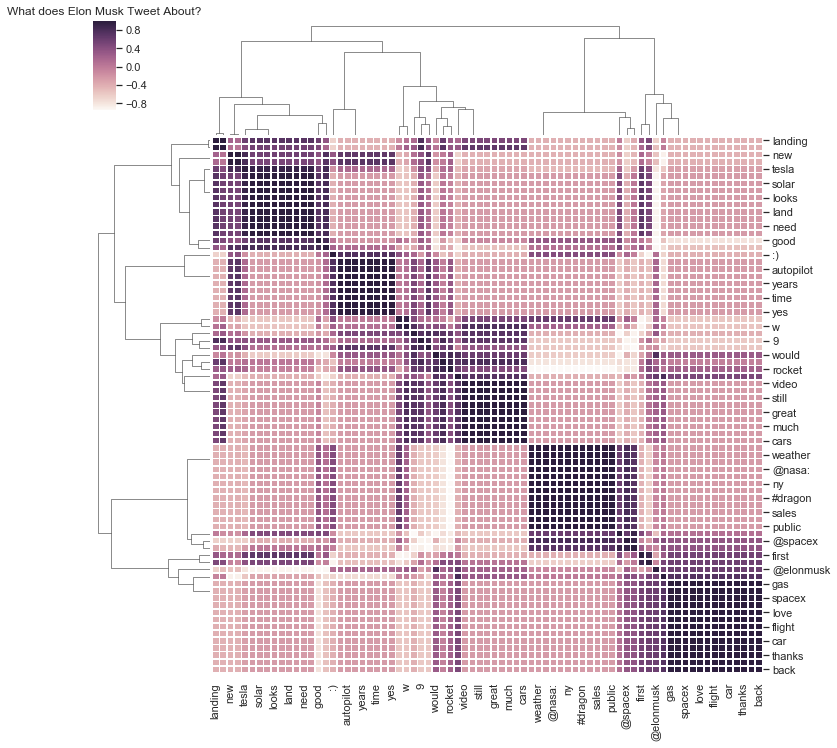

In [347]:
g=sns.clustermap(df_lda.corr(), center=0, cmap=sns.cubehelix_palette(light=1, as_cmap=True), metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title("What does Elon Musk Tweet About?")
plt.show()


In [282]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.005188 -37.758842       1        1  43.206059
2      68.276558 -52.745876       2        1  26.585098
0      50.141586 -45.241810       3        1  10.106518
4      57.642612 -27.102055       4        1  10.054447
3      42.654797 -63.381504       5        1  10.047881, topic_info=     Category       Freq           Term      Total  loglift  logprob
10    Default   9.000000           like   9.000000  30.0000  30.0000
135   Default   8.000000            new   8.000000  29.0000  29.0000
1347  Default   5.000000   @teslamotors   5.000000  28.0000  28.0000
82    Default   9.000000         falcon   9.000000  27.0000  27.0000
27    Default   4.000000             :)   4.000000  26.0000  26.0000
231   Default  32.000000          tesla  32.000000  25.0000  25.0000
272   Default   6.000000            ...   6.000000  24.0000  24.0000
1027  Default   3.000000        mission   3.000000  23.0000  23.0000
170   Default   5.000000        @spacex   5.000000  22.0000  22.0000
407   Default   3.000000              w   3.000000  21.0000  21.0000
329   Default  13.000000         launch  13.000000  20.0000  20.0000
322   Default   7.000000         dragon   7.000000  19.0000  19.0000
90    Default  12.000000         rocket  12.000000  18.0000  18.0000
328   Default   8.000000        landing   8.000000  17.0000  17.0000
1394  Default   5.000000      @elonmusk   5.000000  16.0000  16.0000
697   Default   3.000000          video   3.000000  15.0000  15.0000
314   Default   5.000000  @teslamotors:   5.000000  14.0000  14.0000
1122  Default   4.000000          great   4.000000  13.0000  13.0000
180   Default   2.000000         that's   2.000000  12.0000  12.0000
696   Default   2.000000          still   2.000000  11.0000  11.0000
1129  Default   4.000000           time   4.000000  10.0000  10.0000
147   Default  10.000000           good  10.000000   9.0000   9.0000
463   Default   2.000000            gas   2.000000   8.0000   8.0000
256   Default   6.000000              9   6.000000   7.0000   7.0000
252   Default   3.000000           high   3.000000   6.0000   6.0000
324   Default   9.000000           next   9.000000   5.0000   5.0000
1013  Default   1.000000        #dragon   1.000000   4.0000   4.0000
15    Default  10.000000       @spacex:  10.000000   3.0000   3.0000
471   Default   3.000000      autopilot   3.000000   2.0000   2.0000
580   Default  24.000000          model  24.000000   1.0000   1.0000
...       ...        ...            ...        ...      ...      ...
1969   Topic5   0.680403        weather   1.245737   1.6930  -6.1638
3511   Topic5   0.599816     definitely   1.141358   1.6545  -6.2898
1013   Topic5   0.763609        #dragon   1.679936   1.5094  -6.0484
272    Topic5   1.643399            ...   6.465309   0.9281  -5.2819
170    Topic5   1.434459        @spacex   5.185218   1.0128  -5.4179
575    Topic5   0.642983        company   1.466846   1.4731  -6.2203
1347   Topic5   1.300806   @teslamotors   5.419316   0.8708  -5.5157
2919   Topic5   0.331199      breaking:   0.494769   1.8964  -6.8837
322    Topic5   1.412292         dragon   7.342783   0.6493  -5.4335
3121   Topic5   0.363380         there.   0.592487   1.8089  -6.7910
1027   Topic5   0.887467        mission   3.234679   1.0045  -5.8981
1597   Topic5   0.673944            big   1.914530   1.2537  -6.1733
15     Topic5   1.457897       @spacex:  10.280041   0.3446  -5.4017
27     Topic5   0.938338             :)   4.722875   0.6817  -5.8424
21     Topic5   0.569561           crew   1.667387   1.2237  -6.3416
147    Topic5   1.237688           good  10.841692   0.1277  -5.5655
329    Topic5   1.333350         launch  13.330413  -0.0045  -5.4910
407    Topic5   0.743745              w   3.885978   0.6444  -6.0748
73     Topic5   0.686186         really   3.338643   0.7156  -6.1553
231    Topic5   1.323985          tesla  32.15

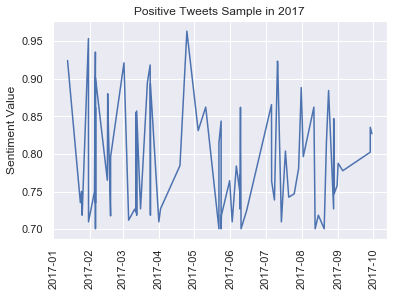

In [283]:
# plot the positive tweets as a trend line 
x1 = positive_tweets["Date"][positive_tweets["Date"].dt.year >= 2017]
y1 = positive_tweets["Sentiment"][positive_tweets["Date"].dt.year >= 2017]

sns.set()
plt.xticks(rotation='vertical')
plt.title("Positive Tweets Sample in 2017")
plt.ylabel("Sentiment Value")
plt.plot(x1,y1);

In [284]:
stocks["Value"] = (stocks["Open"]+stocks["High"]+stocks["Low"]+stocks["Adj Close"]/4)
stocks.drop(columns=["Open", "High", "Low", "Volume", "Adj Close"],inplace=True)
stocks.head()

,Date,Value
0,2010-06-29,67.512501
1,2010-06-30,85.467500
2,2010-07-01,76.680000
3,2010-07-02,69.609999
4,2010-07-06,59.857500


In [285]:
# look at the stocks data for 2017 
sample_2017_stocks = stocks[stocks["Date"].dt.year == 2017]
sample_2017_stocks.head()

,Date,Value
1640,2017-01-03,700.397511
1641,2017-01-04,713.807499
1642,2017-01-05,732.537491
1643,2017-01-06,739.942487
1644,2017-01-09,746.709999


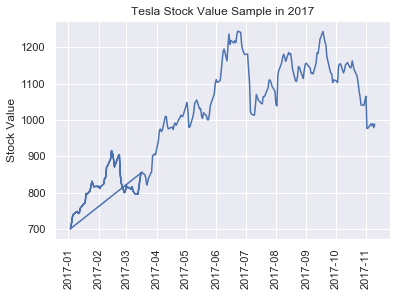

In [286]:
# plot stock value for 2017
x2 = sample_2017_stocks["Date"]
y2 = sample_2017_stocks["Value"]

sns.set()
plt.xticks(rotation='vertical')
plt.title("Tesla Stock Value Sample in 2017")
plt.ylabel("Stock Value")
plt.plot(x2,y2);

In [287]:
# combine two dataframes 
sample_2017_pos = positive_tweets[positive_tweets["Date"].dt.year == 2017]
len(sample_2017_pos)

85

In [288]:
# reformat dates to be the same 
sample_2017_pos["Date"] = sample_2017_pos["Date"].dt.date
sample_2017_stocks["Date"] = sample_2017_stocks["Date"].dt.date

In [289]:
pos_spike = sample_2017_stocks.merge(sample_2017_pos, on="Date", how="outer")

In [290]:
pos_spike.head()

,Date,Value,Tweet,Sentiment,Positive,Neutral,Negative
0,2017-01-03,700.397511,NaN,NaN,NaN,NaN,NaN
1,2017-01-03,700.397500,NaN,NaN,NaN,NaN,NaN
2,2017-01-04,713.807499,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,713.807500,NaN,NaN,NaN,NaN,NaN
4,2017-01-05,732.537491,NaN,NaN,NaN,NaN,NaN


In [291]:
pos_spike.dropna(inplace=True)

In [292]:
pos_spike.shape

(74, 7)

In [293]:
# drop duplicate tweets 
pos_spike.drop_duplicates(subset="Tweet",inplace=True)
pos_spike.head()

,Date,Value,Tweet,Sentiment,Positive,Neutral,Negative
14,2017-01-12,742.737496,"@JRMYGRNBRGR Hopefully, early next week. Resul...",0.9246,0.490,0.449,0.061
26,2017-01-23,804.470004,"@stephenstohn Yes, safety should improve signi...",0.7351,0.356,0.551,0.093
28,2017-01-24,818.102497,@danahull Rex is an exceptionally competent ex...,0.7501,0.233,0.767,0.000
30,2017-01-25,831.187492,Exciting progress on the tunnel front. Plan to...,0.7184,0.333,0.667,0.000
36,2017-01-30,817.577499,"@ReesAndersen @FLIxrisk Yes, I believe that is...",0.7096,0.421,0.462,0.118


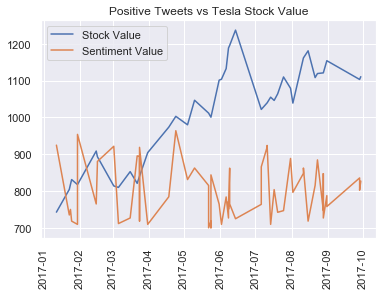

In [294]:
# plot the 2017 data together 
x = pos_spike["Date"]
y1 = pos_spike["Value"]
y2 = pos_spike["Sentiment"]

plt.title("Positive Tweets vs Tesla Stock Value")
plt.plot(x, y1, label="Stock Value")
plt.plot(x, y2*1000, label = "Sentiment Value")
plt.xticks(rotation="vertical")
plt.legend(loc="upper left")
plt.show();

In [295]:
# find correlation between the two lines 
pos_spike.corr()

,Value,Sentiment,Positive,Neutral,Negative
Value,1.000000,-0.158948,-0.177532,0.192189,-0.082587
Sentiment,-0.158948,1.000000,0.137894,-0.153290,0.081774
Positive,-0.177532,0.137894,1.000000,-0.977622,-0.040342
Neutral,0.192189,-0.153290,-0.977622,1.000000,-0.170757
Negative,-0.082587,0.081774,-0.040342,-0.170757,1.000000


In [296]:
# save dataframe as csv
pos_spike = pos_spike[["Date", "Value", "Sentiment", "Tweet"]]
pos_spike.to_csv(r'/Users/biancapery/Desktop/Stock_Sentiment_Analysis/Notebooks/spike_tableau.csv')

# Goal
- make new dataframe with all of the indices on it and as few nans as possible 

In [322]:
news["Date"] = pd.to_datetime(news["Date"])
news.head()

,Date,News_Sentiment
0,2010-06-22,-0.2960
1,2012-05-31,0.4939
2,2012-06-25,0.0000
3,2012-08-03,0.0000
4,2012-10-23,0.3818


In [298]:
# rescale employee sentiment 
ratings["rating"] = ratings["rating"].astype(str)
scaled_sent = {"1.0":"-1", "2.0":"-.5", "3.0":"0", "4.0":".5", "5.0":"1"}
ratings.replace({"rating":scaled_sent},inplace=True)
ratings["rating"] = (ratings["rating"]).astype(float)
ratings.rename(columns={"rating":"Employee_Sentiment"},inplace=True)
ratings.rename(columns={"date":"Date"},inplace=True)
ratings.head()

,Date,Employee_Sentiment
0,2012-04-02,0.5
1,2012-06-28,0.0
2,2012-07-24,0.0
3,2012-08-08,1.0
4,2012-08-26,1.0


In [299]:
# change tweets and reformat
tweets["Date"] = tweets["Date"].dt.date
tweets["Date"] = pd.to_datetime(tweets["Date"],errors='coerce')
tweets.drop(columns=["Positive","Neutral","Negative"],inplace=True)
tweets.rename(columns={"Sentiment":"Tweet_Sentiment"},inplace=True)
tweets.head()

,Tweet,Date,Tweet_Sentiment
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29,0.8271
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29,0.3818
2,@bigajm Yup :),2017-09-29,0.4588
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29,0.0000
4,Fly to most places on Earth in under 30 mins a...,2017-09-29,0.0000


In [300]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 3 columns):
Tweet              3218 non-null object
Date               3218 non-null datetime64[ns]
Tweet_Sentiment    3218 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 75.5+ KB


In [301]:
stocks.head()

,Date,Value
0,2010-06-29,67.512501
1,2010-06-30,85.467500
2,2010-07-01,76.680000
3,2010-07-02,69.609999
4,2010-07-06,59.857500


In [303]:
# for each day, get the average 
tweets = (tweets.groupby("Date")["Tweet_Sentiment"].mean()) # on tweets
news = news.groupby("Date")["News_Sentiment"].mean() # on news 
ratings = ratings.groupby("Date")["Employee_Sentiment"].mean() # on news 

In [305]:
# convert back to dataframe 
tweets = pd.DataFrame(tweets)
news = pd.DataFrame(news)
ratings = pd.DataFrame(ratings)

In [309]:
# reset the indices
tweets.reset_index(inplace=True)
news.reset_index(inplace=True)
ratings.reset_index(inplace=True)

In [330]:
# concatenate the data 
test = pd.concat([stocks,tweets,news,ratings])
small_df = test.sort_values("Date").groupby("Date").mean().reset_index().dropna()

In [336]:
small_df = small_df.reset_index().drop(columns=["index"])
small_df

,Date,Employee_Sentiment,News_Sentiment,Tweet_Sentiment,Value
0,2012-12-26,0.000000,0.0000,0.589800,110.357500
1,2015-02-09,1.000000,0.1027,0.161167,699.670001
2,2015-09-16,0.000000,0.1779,0.000000,834.362502
3,2016-02-18,1.000000,0.0000,0.324650,551.832500
4,2016-04-06,1.000000,0.0000,-0.044170,841.514996
5,2016-04-07,0.500000,0.1806,-0.284600,854.600003
6,2016-04-08,0.000000,0.4939,0.151683,831.857506
7,2016-04-27,1.000000,0.0000,-0.012229,820.017497
8,2016-09-14,1.000000,0.0000,-0.056250,637.633000
9,2016-10-27,0.500000,-0.5563,0.402825,677.692493


In [342]:
# make column of average sentiment
small_df["Average_Sentiment"] =  (small_df["Employee_Sentiment"] + small_df["News_Sentiment"] + small_df["Tweet_Sentiment"]) / 3

In [348]:
small_df.corr()

,Employee_Sentiment,News_Sentiment,Tweet_Sentiment,Value,Average_Sentiment
Employee_Sentiment,1.000000,-0.528675,0.025530,0.083456,0.775683
News_Sentiment,-0.528675,1.000000,-0.331283,0.056553,-0.174104
Tweet_Sentiment,0.025530,-0.331283,1.000000,-0.361356,0.440908
Value,0.083456,0.056553,-0.361356,1.000000,-0.097334
Average_Sentiment,0.775683,-0.174104,0.440908,-0.097334,1.000000


In [349]:
from sklearn.metrics import r2_score

In [351]:
x = small_df["Value"]
y1 = small_df["Employee_Sentiment"]
y2 = small_df["News_Sentiment"]
y3 = small_df["Tweet_Sentiment"]
y4 = small_df["Average_Sentiment"]

r2_score(x,y1), r2_score(x,y2), r2_score(x,y3), r2_score(x,y4)

(-11.566434549814735,
 -11.576501751709355,
 -11.578269990982337,
 -11.573732435881636)

In [344]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
Date              149 non-null datetime64[ns]
News_Sentiment    149 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [345]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 2 columns):
Date                  993 non-null datetime64[ns]
Employee_Sentiment    993 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.6 KB


In [346]:
small_df.to_csv(r'/Users/biancapery/Desktop/Stock_Sentiment_Analysis/Notebooks/small_df.csv')

In [ ]:
# new dataframe with all yearly rolling average 